In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [39]:
mat = cv.imread('../tobeuploaded/Hassan.jpg')
# mat_2 = cv.imread('tobeuploaded\worldCup.jpg')
mat = cv.cvtColor(mat, cv.COLOR_BGR2GRAY)
# mat_2 = cv.cvtColor(mat_2, cv.COLOR_BGR2GRAY)

In [4]:
mat.shape

(800, 800)

In [40]:
fou = np.fft.fft2(mat)
fou = np.fft.fftshift(fou)
# fou_2 = np.fft.fft2(mat_2)
# fou_2 = np.fft.fftshift(fou_2)

In [45]:
cv.imshow('mat', np.log(np.abs(fou)))
cv.waitKey(0)
# cv.destroyAllWindows()

-1

In [6]:
fou.shape

(800, 800)

In [50]:
x = 200
y = 200
cut_mat = np.ones((mat.shape[0], mat.shape[1]))
cut_mat[300:300+x,200:200+y] = 0
cut_mat_1 = np.ones((mat.shape[0], mat.shape[1]))
cut_mat_1[200:200+x,100:100+y] = 0

In [51]:
fou = fou*cut_mat
fou_2 = fou_2*cut_mat_1

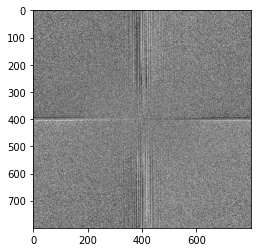

In [65]:
plt.imshow(np.angle(fou_2),cmap='gray')

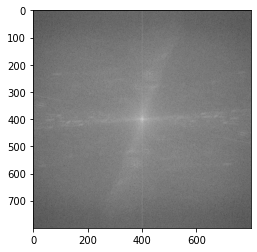

In [66]:
plt.imshow(np.log(np.abs(fou)), cmap='gray')
# cv.waitKey(0)
# cv.destroyAllWindows()?

In [70]:
re_fou = np.abs(fou_2)*np.exp(1j*np.angle(fou))

In [71]:
invo = np.fft.ifft2(re_fou)

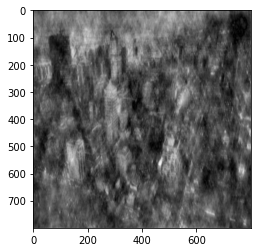

In [72]:
plt.imshow(np.abs(invo),cmap='gray')
# cv.waitKey(0)
# cv.destroyAllWindows()

In [26]:
def fourier(img):
    matrix = cv.imread(img)
    matrix = cv.cvtColor(matrix, cv.COLOR_BGR2GRAY)
    fourier = np.fft.fft2(matrix)
    fourier = np.fft.fftshift(fourier)
    return fourier
def magphase(fourier, select):
    if select == 'mag':
        return np.abs(fourier)
    elif select == 'phase':
        return np.angle(fourier)
def cut(fourier, x, y,width, height, select):
    if select == 'cut':
        cut_mat = np.ones((fourier.shape[0], fourier.shape[1]))
        cut_mat[y:y+height,x:x+width] = 0
    elif select == 'keep':
        cut_mat = np.zeros((fourier.shape[0], fourier.shape[1]))
        cut_mat[y:y+height,x:x+width] = 1
    return fourier*cut_mat
def visulaize(fourier):
    plt.imshow(fourier, cmap='gray')
def re_fourier(magnitude,phase):
    re_fourier = magnitude*np.exp(1j*phase)
    re_fourier = np.fft.ifft2(re_fourier)
    return re_fourier

In [3]:
list_1 = [100,50,200,100]
list_2 = [400,100,500,200]
lists = [list_1,list_2]

C:\Users\User\AppData\Local\Temp\ipykernel_17388\2413894302.py:7: RuntimeWarning: divide by zero encountered in log
  visulaize(np.log(fou_e_1))
C:\Users\User\AppData\Local\Temp\ipykernel_17388\2413894302.py:10: RuntimeWarning: divide by zero encountered in log
  visulaize(np.log(fou_e_2))
C:\Users\User\AppData\Local\Temp\ipykernel_17388\2413894302.py:13: RuntimeWarning: divide by zero encountered in log
  visulaize(np.log(fou_e_3))


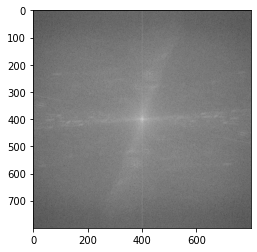

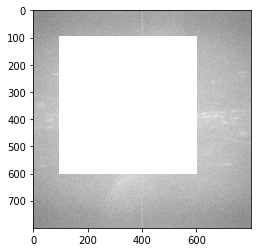

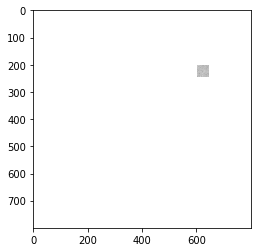

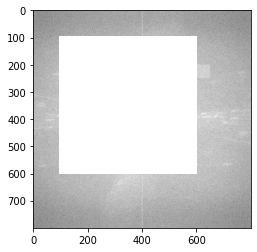

In [34]:
fou = fourier('../tobeuploaded/city.jpeg')
fou_1 = magphase(fou,'mag')
plt.figure()
visulaize(np.log(fou_1))
fou_e_1 = cut(fou_1,100,100,500,500,'cut')
plt.figure()
visulaize(np.log(fou_e_1))
fou_e_2 = cut(fou_1,600,200,50,50,'keep')
plt.figure()
visulaize(np.log(fou_e_2))
fou_e_3 = fou_e_1+fou_e_2
plt.figure()
visulaize(np.log(fou_e_3))
# plt.figure()
# visulaize(fou,'phase')

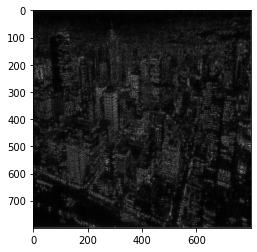

In [35]:
img_new = re_fourier(fou_e_3,np.angle(fou))
plt.figure()
visulaize(np.abs(img_new))

C:\Users\User\AppData\Local\Temp\ipykernel_15488\679384665.py:24: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fou)),cmap='gray')
C:\Users\User\AppData\Local\Temp\ipykernel_15488\679384665.py:26: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fou_2)),cmap='gray')


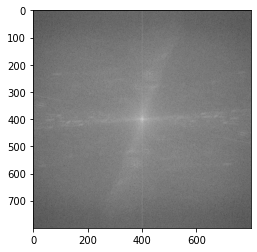

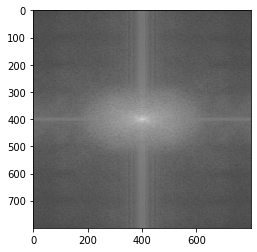

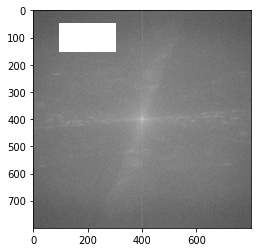

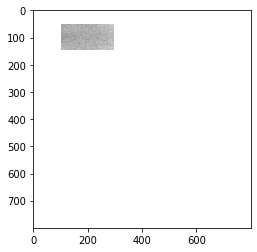

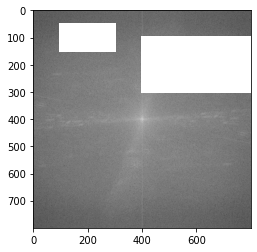

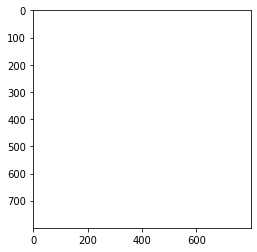

In [25]:
fou = fourier('tobeuploaded\city.jpeg')
fou_2 = fourier('tobeuploaded\worldCup.jpg')
plt.figure()
visulaize(fou,'mag')
plt.figure()
visulaize(fou_2,'mag')
flag = False
for i in lists:
    x = i[0]
    y = i[1]
    w = i[2]
    h = i[3]
    old_fou = fou_2
    fou = cut(fou,x,y,w,h,'cut')
    fou_2 = cut(fou_2,x,y,w,h,'keep')
    flag = True
    if flag:
        fou_3 = fou_2+old_fou
    # re_fou = re_fourier(fou)
    # re_fou_2 = re_fourier(fou_2)
    # invo = np.fft.ifft2(re_fou)
    # invo_2 = np.fft.ifft2(re_fou_2)
    plt.figure()
    plt.imshow(np.log(np.abs(fou)),cmap='gray')
    plt.figure()
    plt.imshow(np.log(np.abs(fou_2)),cmap='gray')

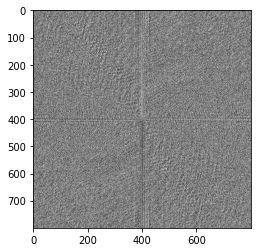

In [120]:
fou = fourier('./tobeuploaded/camera.jpg')
visulaize(fou, 'phase')
# re_fou = re_fourier(fou)
# invo = np.fft.ifft2(re_fou)
# plt.imshow(np.abs(invo),cmap='gray')

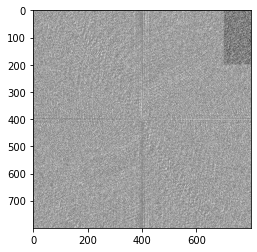

In [121]:
fou = cut(fou,700,0,100,200,'keep')
visulaize(fou, 'phase')

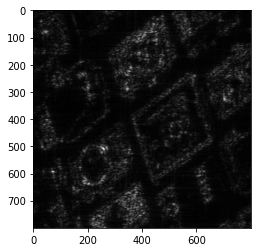

In [122]:
re_fou = re_fourier(fou)
invo = np.fft.ifft2(re_fou)
plt.imshow(np.abs(invo),cmap='gray')